In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install antspyx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 62.4 MB/s eta 0:00:00


### To get the nii.gz/transform file one can go to https://github.com/neurodata/neuroparc/tree/master/atlases/transforms

In [ ]:
import ants


# read / write images
img = ants.image_read('/content/AAL_space-MNI152NLin6_res-2x2x2.nii.gz')
# transform_path = '/content/MNI152NLin6_2_MNI152NLin2009cAsym.h5'
# transform = ants.read_transform(transform_path)
# transform1 = ants.read_transform("/content/MNI152NLin2009cAsym_2_MNI152NLin6.h5")
target_template = ants.image_read('/content/drive/MyDrive/fmri_all_sub01/sub-001/anat/sub-001_space-MNI152NLin2009cAsym_res-2_dseg.nii.gz')
transformed_image = ants.apply_transforms(fixed=target_template,
                                          moving=img,
                                          transformlist=["/content/MNI152NLin2009cAsym_2_MNI152NLin6.h5"])

In [ ]:
# prompt: get 3 dimensional array where img_data==31, save in to a file called L_superior_temporal_gyrus_31

import numpy as np

# Assuming 'img_data' is your ANTs image data
L_Heschl_gyrus_AAL_83= np.where(transformed_image.numpy() == 83)

# Save the array to a file
np.save('L_Heschl_gyrus_AAL_83.npy',L_Heschl_gyrus_AAL_83)



In [ ]:
len(L_Heschl_gyrus_AAL_83[1])

594

In [ ]:
# prompt: get 3 dimensional array where img_data==31, save in to a file called L_superior_temporal_gyrus_31

import numpy as np

# Assuming 'img_data' is your ANTs image data
R_Heschl_gyrus_AAL_84= np.where(transformed_image.numpy() == 84)

# Save the array to a file
np.save('R_Heschl_gyrus_AAL_84.npy',R_Heschl_gyrus_AAL_84)



In [ ]:
len(R_Heschl_gyrus_AAL_84[1])

611

In [ ]:
import numpy as np
np.where(transformed_image.numpy() == 83)

(array([18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 

In [ ]:
import numpy as np
for i in range(3):
  print("Minimum value:", np.min(R_Heschl_gyrus_AAL_84[i]))
  print("Maximum value:", np.max(R_Heschl_gyrus_AAL_84[i]))


Minimum value: 60
Maximum value: 82
Minimum value: 67
Maximum value: 78
Minimum value: 23
Maximum value: 39


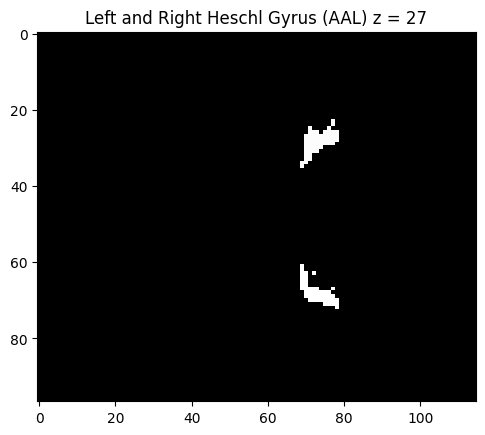

In [ ]:
# prompt: mask and plot the region where transformer image is 83

import matplotlib.pyplot as plt
transformed_image_np = transformed_image.numpy()
# Create a mask where the transformed image has a value of 83
mask = transformed_image_np == 83
mask += transformed_image_np == 84
# Apply the mask to the transformed image
masked_image = transformed_image_np * mask

# Plot the masked image
plt.imshow(masked_image[:, :, 27], cmap='gray')
plt.title('Left and Right Heschl Gyrus (AAL) z = 27')
plt.show()


In [ ]:
masked_image[:, :, 40]

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (97, 115)
	 Spacing    : (2.0, 2.0)
	 Origin     : (96.5, 132.5)
	 Direction  : [1. 0. 0. 1.]